In [1]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!pip install svgling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 3.2 MB/s 


In [2]:
from nltk.tree import Tree

The output from the [default sentence](https://www.scss.tcd.ie/~uidhonne/gaeilgenfuni.cgi?mode=Chunking&text=Rith+siad+an+r%C3%A1s&submit=Go) for the Irish chunker.

In [3]:
sample1 = """
[S
[V Rith ]
[NP siad NP]
[NP an rás NP] S]
"""

In [6]:
buf = []
for tok in sample1.replace("\n", " ").split(" "):
    if tok.endswith("]"):
            buf.append(")")
    else:
            buf.append(tok.replace("[", "("))
intree = " ".join(buf)
newt = Tree.fromstring(intree)

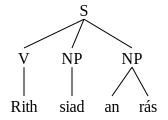

In [9]:
newt

In [10]:
sample2 = """
[S
[V Rith rith+Verb+VTI+PastInd+Len+@FMV ]
[NP siad siad+Pron+Pers+3P+Pl+Sbj+@SUBJ NP]
[NP an an+Art+Sg+Def+@>N rás rás+Noun+Masc+Com+Sg+DefArt+@OBJ NP] S]
"""

In [13]:
buf = []
last_word = ""
for line in sample2.split("\n"):
    for tok in line.split(" "):
        if tok.startswith("["):
            buf.append(tok.replace("[", "("))
        elif tok.endswith("]"):
            buf.append(")")
        elif "+" in tok:
            parts = tok.split("+")
            buf.append("(" + parts[1])
            buf.append(last_word)
            buf.append(")")
            last_word = ""
        else:
            last_word = tok

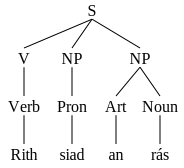

In [15]:
Tree.fromstring(" ".join(buf))

In [20]:
def fix_tree(tree_string):
    buf = []
    last_word = ""
    for line in tree_string.split("\n"):
        for tok in line.split(" "):
            if tok.startswith("["):
                buf.append(tok.replace("[", "("))
            elif tok.endswith("]"):
                buf.append(")")
            elif "+" in tok:
                parts = tok.split("+")
                buf.append("(" + parts[1])
                buf.append(last_word)
                buf.append(")")
                last_word = ""
            else:
                last_word = tok
    return " ".join(buf).replace("(S )", "")

In [17]:
new_samp = """
[S
[COP An is+Cop+Pres+Q+@COP_WH ]
[PRED tusa tú+Pron+Pers+2P+Sg+Emph+@PRED ]
[V a a+Part+Vb+Rel+Direct+@>V chonaic feic+Verb+VTI+PastInd+Len+@FMV_REL ]
[NP é é+Pron+Pers+3P+Sg+Masc+@OBJ NP] ? ?+Punct+Fin+Q+ S]
[S S]
"""

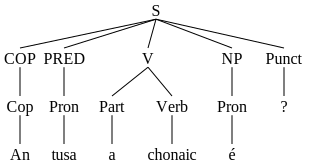

In [21]:
Tree.fromstring(fix_tree(new_samp))